<center><h1><b>Lecture 19</b></h1></center>
<center><h1><b>Introduction to Statistical Inference</b></h1></center>

<center><h2>Chieh-En Lee (李杰恩)</h2></center>

<center>
<h4><a href="mailto:celee@nycu.edu.tw">celee@nycu.edu.tw</a></h4>
</center>

<center><h3><a href="https://dop.nycu.edu.tw/ch/index.html">Department of Photonics</a>, <a href="https://www.nycu.edu.tw/">NYCU</a></h3></center>

<br />
<center><h5><a href="https://github.com/bruce88617/nycudopcs_advanced">Data Science and Python Programming</a>, 2025 Spring</h5></center>


## Last Time

- Limit Theorems
- Monte Carlo Method
    * Area Estimation
    * Univariate Integration
    * Multi-variate Integration


## **Today**

<ul>
    <li><a href="#tag1">Point Estimation</a></li>
    <li><a href="#tag2">Maximum Likelihood Estimation</a></li>
    <li><a href="#tag3">Interval Estimation</a></li>
    <ul>
        <li><a href="#tag4">Interval Estimation with Known Variance</a></li>
        <li><a href="#tag5">Interval Estimation with Unknown Variance</a></li>
    </ul>
    <li><a href="#tag6">Confidence Interval for Normal Samples</a></li>
</ul>


## **Introduction**

In real life, we often work with data influenced by randomness, and we need to extract meaningful information and make conclusions based on that data. This randomness can arise from various sources. Here are two examples:

1. Suppose we want to analyze a baseball player's batting performance over a season. Since we cannot observe every possible scenario in which they might face a pitcher, we rely on a sample of past at-bats to estimate their batting average. The randomness in this case comes from the selection of at-bats, as different pitchers, game conditions, and player performance fluctuations affect the outcomes. Additionally, a player's form may change over time due to factors like fatigue or injuries, introducing another layer of randomness.

2. Another example occurs when tracking the flight of a baseball after it is hit. While we can predict its trajectory using physics, external factors such as wind speed, air resistance, and spin can alter its path in unpredictable ways. Here, the randomness comes from environmental conditions affecting the ball's motion.

Situations like these are common in many fields. The study of how to handle and analyze such randomness falls under the domain of statistical inference.

**Statistical inference** encompasses a set of techniques used to derive conclusions from data influenced by random variation.

Clearly, we use our knowledge of probability theory when we work on statistical inference problems. However, the biggest difference here is that we need to work with **real data**. For example, 

> Let $X$ represent a candidate's approval rating in a poll (expressed as a percentage), assuming $X$ follows a normal distribution with mean $\mu = 50$ and variance $\sigma^2 = 25$. Find the probability that the candidate's approval rating exceeds 60%, i.e., $P(X > 60)$.

In real life, we might not know the distribution of $X$, so we need to collect data, and from the data we should be able to estimate $\mu$ and $\sigma$, and conclude whether $X$ follows a normal distribution or not.

<img src="./assets/fig01.png" height=500px>

### Random Sampling

When collecting data, we often make several measurements (observations) on a random variable, for example, investigating the height distribution of adult males in Taiwan. To do this, we define random variables $X_1, X_2, X_3, ..., X_n$ as follows: We choose a random sample of size $n$ with replacement from the population and let $X_i$ be the height of the $i^{th}$ chosen male.

1. We choose a male uniformly at random from the population and let $X_1$ be the height of that male. Here, every male in the population has the same chance of being chosen.
2. Again, we choose a male uniformly (and independently from the first male) at random from the population and let $X_2$ be the height of that male. As usual, every male in the population has the same chance of being chosen.
3. In general, $X_i$ is the height of the $i^{th}$ male that is chosen uniformly and independently from the population.

About **with and without** replacement: 

> We often do the sampling without replacement in practice, i.e., we do not allow one person to be chosen twice. However, if the population is large, then the probability of choosing one person twice is extremely low, and it can be shown that the results obtained from sampling with replacement are very close to the results obtained using sampling without replacement. The big advantage of sampling with replacement (the above procedure) is that $X_i$'s will be independent and this makes the analysis much simpler.

If we would like to estimate the average height in the population, we may define an estimator as $$\hat{\Theta} = \frac{X_1 + X_2 + X_3 + ... + X_n}{n},$$ which means that $\hat{\Theta}$ is a random variable because it depends on the random sample (variables) $X_1, X_2, X_3, ..., X_n$.

The collection of random variables $X_1, X_2, X_3, ..., X_n$ is said to be a **random sample** of size $n$ if they are **independent and identically distributed (i.i.d.)**.

1. $X_1, X_2, X_3, ..., X_n$ are independent random variables.
2. They have the same distribution, $$F_{X_1}(x) = F_{X_2}(x) = ... = F_{X_n}(x) \text{, for all } x \in \Reals.$$

In the above example, the random variable $\hat{\Theta} = \frac{X_1 + X_2 + X_3 + ... + X_n}{n}$ is called a **point estimator** for the average height of males in the population, and we can obtain $\hat{\Theta} = \hat{\theta}$. Here, $\hat{\theta}$ is called an **estimate** of the average height of males in the population. In general, a point estimator is a function of the random sample $\hat{\Theta} = h(X_1, X_2, X_3, ..., X_n)$ that is used to estimate an unknown quantity.

#### Properties of Random Samples:

Let $X_1, X_2, X_3, ..., X_n$ be a random sample from the same distribution, we assume:

1. The $X_i$'s are independent.
2. $F_{X_1}(x) = F_{X_2}(x) = ... = F_{X_n}(x)$ for all $x \in \Reals$.
3. $\mathbb{E}[X_i] = \mathbb{E}[X] = \mu < \infty$.
4. $0 < \text{Var}(X_i) = \text{Var}(X) = \sigma^2 < \infty$.

Sample mean: $$\bar{X} = \frac{X_1 + X_2 + X_3 + ... + X_n}{n}.$$ Recall that:

1. $\mathbb{E}[\bar{X}] = \mu$.
2. $\text{Var}(\bar{X}) = \frac{\text{Var}(X)}{n} = \frac{\sigma^2}{n}$
3. Weak law of large numbers (WLLN): $$\lim_{n \to \infty} P(|\bar{X} - \mu| \leq \epsilon = 0).$$
4. Central limit theorem: the random variable $$Z_n = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}} = \frac{X_1 + X_2 + X_3 + ... + X_n - n \mu}{\sigma \sqrt{n}}$$ converges to the standard normal random variable $N(0,1)$ as $n \to \infty$.


<a id="tag1"></a>

## **Point Estimation**

Assuming $\theta$ is an unknown parameter to be estimated, for example, the expected value of a random variable $\theta = \mathbb{E}[X]$. An important assumption here is that $\theta$ is a deterministic (non-random) quantity. To estimate $\theta$, we can define a point estimator $\hat{\Theta}$ that is a function of the random sample, i.e., $$\hat{\Theta} = h(X_1, X_2, X_3, ..., X_n).$$

### Evaluation of Estimators

Before we start to introduce how to use point estimator for the estimation of a random variable, we need some quantities to evaluate the performance of estimators (i.e., how good they are?).

#### 1. Bias

The bias of an estimator $\hat{\Theta}$, $B(\hat{\Theta})$, is how far $\hat{\Theta}$ on average is from the real value of $\theta$.

$$
B(\hat{\Theta}) = \mathbb{E}[\hat{\Theta}] - \theta
$$

If $B(\hat{\Theta}) = 0$, we say that $\hat{\Theta}$ is an **unbiased estimator** of $\theta$.

- - -
##### Example 4.1: Bias of Sample Mean

Let $X_1, X_2, X_3, ..., X_n$ be a random sample. Then $\hat{\Theta} = \bar{X} = \frac{X_1 + X_2 + ... + X_n}{n}$ is an unbiased estimator of $\theta = \mathbb{E}[X_i]$.

$$
\begin{aligned}
B(\hat{\Theta}) &= \mathbb{E}[\hat{\Theta}] - \theta \\
    &= \mathbb{E}[\bar{X}] - \theta \\
    &= \frac{\mathbb{E}[X_1] + \mathbb{E}[X_2] + ... + \mathbb{E}[X_n]}{n} - \theta \\
    &= \frac{n \cdot \mathbb{E}[X_i]}{n} - \theta\\
    &= \mathbb{E}[X_i] - \theta \\
    &= 0.
\end{aligned}
$$
- - -

#### 2. Mean Squared Error (MSE)

From the above example, we can conclude that both $\hat{\Theta}_1 = \bar{X}$ and $\hat{\Theta}_2 = X_i$ are unbiased estimator of $\theta$. Nevertheless, $\hat{\Theta}_2$ is clearly not as good as $\hat{\Theta}_1$. Therefore, we need other measures to ensure that an estimator is a "good" estimator. A very common measure is the **mean squared error** defined by $$MSE(\hat{\Theta}) = \mathbb{E} \big[ (\hat{\Theta} - \theta)^2 \big].$$

Note that $\hat{\Theta} - \theta$ is the error that we make when we estimate $\theta$ by $\hat{\Theta}$. Thus, the MSE is a measure of the distance between $\theta$ by $\hat{\Theta}$. A smaller MSE is generally indicative of a better estimator.

- - -
##### Example 4.2: MSE of Sample Mean and One Sample

Let $X_1, X_2, X_3, ..., X_n$ be a random sample from a distribution with mean $\mathbb{E}[X_i] = \theta$, and variance $\text{Var}(X_i) = \sigma^2$. Consider the following two estimators for $\theta$:

1. $\hat{\Theta}_1 = \bar{X} = \frac{X_1 + X_2 + ... + X_n}{n}$.
2. $\hat{\Theta}_2 = X_i$.

- If $n > 1$, we have $MSE(\hat{\Theta}_2) > MSE(\hat{\Theta}_1)$.

- For $MSE(\hat{\Theta}_2)$:

$$
\begin{aligned}
MSE(\hat{\Theta}_2) &= \mathbb{E} \big[ (\hat{\Theta}_2 - \theta)^2 \big] \\
    &= \mathbb{E} \big[ (X_i - \mathbb{E} [X_i])^2 \big] \\
    &= \text{Var}(X_i) \\
    &= \sigma^2.
\end{aligned}
$$

- To find $MSE(\hat{\Theta}_1)$, we have

$$
\begin{aligned}
MSE(\hat{\Theta}_1) &= \mathbb{E} \big[ (\hat{\Theta}_1 - \theta)^2 \big] \\
    &= \mathbb{E} \big[ (\bar{X} - \theta)^2 \big] \\
    &= \text{Var}(\bar{X} - \theta) + \big( \mathbb{E}[\bar{X} - \theta] \big)^2 
        \text{ } \big( \because \mathbb{E}[Y^2] = \text{Var}(Y) + (\mathbb{E}[Y])^2 \big) \\
    &= \text{Var}(\bar{X}) \\
    &= \frac{\sigma^2}{n}.
\end{aligned}
$$

- Therefore, we conclude that:

    1. $\hat{\Theta}_1 = \bar{X}$ is probably a better estimator for the value of $\theta$ (the expected value) since it has smaller MSE.
    2. Let $\hat{\Theta}_1, \hat{\Theta}_2, ..., \hat{\Theta}_i, ...$ be a sequence of point estimators of $\theta$. $MSE(\hat{\Theta}_i) \to 0$ as $i \to \infty$.


In [1]:
from scripts.testFuncs import test1

test1(n1=10, n2=1, numExp=100)

n = 10:
    Bias = 0.0125961
    MSE = 0.0001587
n = 1:
    Bias = 0.0985961
    MSE = 0.0097212


- - -

#### Brief Summary

$\bar{X} = \frac{X_1 + X_2 + ... + X_n}{n}$ is a better and reasonable point estimator for the mean $\mathbb{E}[X_i] = \theta$.


### Point Estimators for Variance

To estimate the variance of a distribution $\sigma^2 = \mathbb{E} \big[ (X - \mu)^2 \big]$, we have known that the variance itself is the mean of the random variable $Y = (X - \mu)^2$. This suggests the following estimator for the variance

$$
\hat{\sigma}^2 = \frac{1}{n} \sum_{k=1}^{n} (X_k - \mu)^2.
$$

By linearity of expectation, $\hat{\sigma}^2$ is an unbiased estimator of $\sigma^2$. However, in practice we often do not know the value of $\mu$. Thus, **we have to replace $\mu$ by our estimate of the $\mu$ (i.e., the sample mean)**, to obtain the following estimator for $\sigma^2$:

$$
\begin{aligned}
\bar{S}^2 &= \frac{1}{n} \sum_{k=1}^{n} (X_k - \bar{X})^2 \\
    &= \frac{1}{n} \Bigg( \sum_{k=1}^{n} X_k^2 - n \bar{X}^2 \Bigg).
\end{aligned}
$$

Intuitively, we are curious about what is the bias of our estimator of $\sigma^2$, 

$$
B(\bar{S}^2) = \mathbb{E}[\bar{S}^2] - \sigma^2
$$

Let $X_1, X_2, X_3, ..., X_n$ be a random sample from a distribution with mean $\mathbb{E}[X_i] = \theta$, and variance $\text{Var}(X_i) = \sigma^2$. We have

$$
\begin{aligned}

\because 
\mathbb{E}[\bar{X}^2] &= (\mathbb{E}[\bar{X}])^2 + \text{Var}(\bar{X}) \\
    &= \mu^2 + \frac{\sigma^2}{n}. \\

\implies 
\mathbb{E}[\bar{S}^2] &= \frac{1}{n} \Bigg( \sum_{k=1}^{n} \mathbb{E}[X_k^2] - n \mathbb{E}[\bar{X}^2] \Bigg) \\
    &= \frac{1}{n} \Bigg( \sum_{k=1}^{n} \Big( \mu^2 + \sigma^2 \Big) - n \Big( \mu^2 + \frac{\sigma^2}{n} \Big) \Bigg) \\
    &= \frac{1}{n} \Bigg( n \Big( \mu^2 + \sigma^2 \Big) - n \Big( \mu^2 + \frac{\sigma^2}{n} \Big) \Bigg) \\
    &= \frac{n-1}{n} \sigma^2. \\

\therefore 
B(\bar{S}^2) &= \mathbb{E}[\bar{S}^2] - \sigma^2 \\
    &= - \frac{\sigma^2}{n}.

\end{aligned}
$$

We conclude that $\bar{S}^2$ is a biased estimator of the variance. Nevertheless, note that if $n \to \infty$, then $B(\bar{S}^2) \to 0$. 

Also, we can obtain an unbiased estimator of $\sigma^2$ by multiplying $\bar{S}^2$ by $\frac{n}{n-1}$, as the **sample variance** $S$

$$
S^2 = \frac{1}{n-1} \sum_{k=1}^{n} (X_k - \bar{X})^2 
    = \frac{1}{n-1} \Bigg( \sum_{k=1}^{n} X_k^2 - n \bar{X}^2 \Bigg).
$$




In [2]:
from scripts.testFuncs import test2

test2(p=0.5, numTrials=10)

Number of Experiment = 2:
    Theoretical value of Variance = 0.0833333
    Result of biased estimator of variance = 2.1600000
    Result of unbiased estimator of variance = 2.4000000
Number of Experiment = 100:
    Theoretical value of Variance = 0.0833333
    Result of biased estimator of variance = 4.2400000
    Result of unbiased estimator of variance = 4.7111111


<a id="tag2"></a>

## **Maximum Likelihood Estimation**

So far, we have discussed estimating the mean and variance of a distribution. Now, we would like to introduce a systematic way of parameter estimation, called the **Maximum Likelihood Estimation (MLE)**. Before we start to introduce the idea behind MLE, let us first look at an example.

- - -

#### Example 4.3: A Bag with 3 Balls

We have a bag that contains $3$ balls. Each ball is either red or blue, but we have no information in addition to this. Thus, the number of blue balls $\theta$ might be 0, 1, 2, or 3. You are allowed to choose 4 balls at random from the bag with replacement. We define the random variables $X_1$, $X_2$, $X_3$, and $X_4$ as follows 

$$
X_i = \begin{cases} 
    1 &\text{if the } i^{\text{th}} \text{ chosen ball is blue} \\ 
    0 &\text{if the } i^{\text{th}} \text{ chosen ball is red} 
\end{cases}.
$$

Note that $X_i$'s are i.i.d. and $X_i \sim Bernoulli(\frac{\theta}{3})$. After doing my experiment, we observe the following values for $X_i$'s. $$(x_1, x_2, x_3, x_4) = (1, 0, 1, 1).$$

1. For each possible value of $\theta$, find the probability of the observed sample, $(x_1, x_2, x_3, x_4) = (1, 0, 1, 1)$.
2. For which value of $\theta$ is the probability of the observed sample is the largest?

- Since $X_i \sim Bernoulli(\frac{\theta}{3})$, we have

$$
P_{X_i}(x) = \begin{cases}
    \frac{\theta}{3} &\text{for } x = 1 \\
    1 - \frac{\theta}{3} &\text{for } x = 0 \\
\end{cases}.
$$

- Therefore, the joint PMF of $X_1$, $X_2$, $X_3$, and $X_4$ can be written as

$$
\begin{aligned}
P_{X_1, X_2, X_3, X_4}(x_1, x_2, x_3, x_4) &= P_{X_1}(x_1)P_{X_2}(x_2)P_{X_3}(x_3)P_{X_4}(x_4) \\
\implies P_{X_1, X_2, X_3, X_4}(1, 0, 1, 1) &= \frac{\theta}{3} \cdot \Big( 1 - \frac{\theta}{3} \Big) 
\cdot \frac{\theta}{3} \cdot \frac{\theta}{3} \\
    &= \Big( \frac{\theta}{3} \Big)^3 \Big( 1 - \frac{\theta}{3} \Big).
\end{aligned}
$$

|$\theta$|$P_{X_1, X_2, X_3, X_4}(1, 0, 1, 1; \theta)$|
|:------:|:------------------------------------------:|
|0|0|
|1|0.0247|
|2|0.0988|
|3|0|

- From the table we see that the probability of the observed data is maximized for $\theta = 2$. This means that the observed data is most likely to occur for $\theta = 2$. For this reason, we may choose $\hat{\theta} = 2$ as our estimate of $\theta$. This is called the **Maximum Likelihood Estimation (MLE)** of $\theta$.

- - -



### Definition of Maximum Likelihood Estimation (MLE)

Let $X_1, X_2, X_3, ..., X_n$ be a random sample from a distribution with a parameter $\theta$. Suppose that we have observed $X_1 = x_1, X_2 = x_2, ..., X_n = x_n$.

1. If $X_i$'s are discrete, the the likelihood function is defined as $$L(x_1, x_2, ..., x_n; \theta) = P_{X_1, X_2, ..., X_n}(x_1, x_2, ..., x_n; \theta)$$.
2. If $X_i$'s are jointly continuous, the the likelihood function is defined as $$L(x_1, x_2, ..., x_n; \theta) = f_{X_1, X_2, ..., X_n}(x_1, x_2, ..., x_n; \theta)$$.

In some problems, it is easier to work with the **log likelihood function** given by

$$
\ln L(x_1, x_2, ..., x_n; \theta).
$$

A **Maximum Likelihood Estimation (MLE)** of $\theta$, shown by $\hat{\theta}_{ML}$ is a value of $\theta$ that maximizes the likelihood function. Also, you should notice that the estimator $\hat{\Theta}_{ML} = \hat{\Theta}_{ML}(X_1, X_2, ..., X_n)$ is a random variable whose value when $X_1 = x_1, X_2 = x_2, ..., X_n = x_n$ is given by $\hat{\theta}_{ML}$.

- - -

#### Example 4.4: MLE, 1 unknown parameter to estimate

If $X_i \sim Binomial(m, \theta)$ and we have observed $X_1, X_2, X_3, ..., X_n$. Find the maximum likelihood estimator of $\theta$.

$$
\begin{aligned}
L(x_1, x_2, ..., x_n; \theta) 
    &= P_{X_1, X_2, ..., X_n}(x_1, x_2, ..., x_n; \theta) \\
    &= \prod_{k=1}^{n} P_{X_k}(x_k; \theta) \\
    &= \prod_{k=1}^{n} \binom{m}{x_k} \theta^{x_k} \cdot (1 - \theta)^{m - x_k} \\
    &= \Bigg[ \prod_{k=1}^{n} \binom{m}{x_k} \Bigg] \cdot \theta^{\sum_{k=1}^{n} x_k} \cdot (1 - \theta)^{\sum_{k=1}^{n}(m - x_k)} \\
    &= \text{constant} \cdot \theta^{s} \cdot (1 - \theta)^{mn - s} \text{, let } s = \sum_{k=1}^{n} x_k

\end{aligned}
$$

- Therefore, we have

$$
\hat{\theta}_{ML} = \frac{1}{mn} \sum_{k=1}^{n} x_k.
$$

- This suggests that the MLE can be written as

$$
\hat{\Theta}_{ML} = \frac{1}{mn} \sum_{k=1}^{n} X_k.
$$

- - -



#### Exercise 4.1

If $X_i \sim Exponential(\theta)$ and we have observed $X_1, X_2, X_3, ..., X_n$. Find the maximum likelihood estimator of $\theta$.

- - -

In general, $\theta$ could be a vector of parameters, and we can apply the same methodology to obtain the MLE. For example, if we have $k$ unknown parameters $\theta_1, \theta_2, ..., \theta_k$, then we need to maximize the likelihood function $$L(x_1, x_2, ..., x_n; \theta_1, \theta_2, ..., \theta_k)$$ to obtain the maximum likelihood estimators $\hat{\Theta}_1, \hat{\Theta}_2, ..., \hat{\Theta}_k$.

#### Example 4.5: MLE, 2 unknown parameters to estimate

If $X_i \sim N(\theta_1, \theta_2)$ and we have observed $X_1, X_2, X_3, ..., X_n$. $$f_{X_i}(x_i; \theta_1, \theta_2) = \frac{1}{\sqrt{2 \pi \theta_2}} e^{- \frac{(x_i - \theta_1)^2}{2 \theta_2}}$$ Find the maximum likelihood estimators of $\theta_1$ and $\theta_2$.

$$
\begin{aligned}
L(x_1, x_2, ..., x_n; \theta_1, \theta_2) 
    &= \prod_{k=1}^{n} f_{X_k}(x_k; \theta_1, \theta_2) \\
    &= \prod_{k=1}^{n} \frac{1}{\sqrt{2 \pi \theta_2}} e^{- \frac{(x_i - \theta_1)^2}{2 \theta_2}} \\
    &= (2 \pi \theta_2)^{- \frac{n}{2}} \cdot \exp \Bigg[ - \sum_{k=1}^{n} \frac{(x_i - \theta_1)^2}{2 \theta_2} \Bigg] \\

\implies \ln L(\bold{x}; \theta_1, \theta_2) 
    &= - \frac{n}{2} \ln (2 \pi) - \frac{n}{2} \ln \theta_2 - \frac{1}{2 \theta_2} \sum_{k=1}^{n} (x_i - \theta_1)^2
\end{aligned}
$$

- To find the maximum value, we have the derivatives with respect to $\theta_1$ and $\theta_2$,

$$
\begin{aligned}
\frac{\partial}{\partial \theta_1} \ln L(\bold{x}; \theta_1, \theta_2)
    &= \frac{1}{\theta_2} \sum_{k=1}^{n} (x_i - \theta_1) = 0 \\
\frac{\partial}{\partial \theta_2} \ln L(\bold{x}; \theta_1, \theta_2)
    &= - \frac{n}{2 \theta_2} + \frac{1}{2 \theta_2^2} \sum_{k=1}^{n} (x_i - \theta_1)^2 = 0 
\end{aligned}.
$$

- By solving the above equations, we obtain the following maximum likelihood estimators for $\theta_1$ and $\theta_2$,

$$
\begin{aligned}
\hat{\theta}_1 &= \frac{1}{n} \sum_{k=1}^{n} x_i \\
\hat{\theta}_2 &= \frac{1}{n} \sum_{k=1}^{n} (x_i - \hat{\theta}_1)^2
\end{aligned}.
$$



<a id="tag3"></a>

## **Interval Estimation**

So far, we have discussed point estimation for $\theta$. The point estimator $\hat{\theta}$ alone does not give much information about $\theta$, which means we do not know how close $\hat{\theta}$ is to the real $\theta$. Therefore, we will introduce the concept of **interval estimation**. In this approach, instead of giving just one value $\hat{\theta}$ as the estimation for $\theta$, we will produce an interval that is likely to include the true value of $\theta$. That means, instead of saying $$\hat{\theta} = 94.00,$$ we might report the interval $$[\hat{\theta}_l, \hat{\theta}_h] = [93.13, 94.87],$$ which we hope includes the real value of $\theta$.

In interval estimation, there are two important concepts. 

1. One is the length of the reported interval, $\hat{\theta}_h - \hat{\theta}_l$, which shows the precision with which we can estimate $\theta$.
2. The second one is the confidence level that shows how confident we are about the interval. The confidence level is the probability that the interval that we construct includes the real value of $\theta$.

- - -

### Definition of Interval Estimation

Let $X_1, X_2, X_3, ..., X_n$ be a random sample from a distribution with a parameter $\theta$ that is to be estimated. An **interval estimator with confidence level** $1 - \alpha$ consists of two estimators $\hat{\Theta}_l (X_1, X_2, X_3, ..., X_n)$ and $\hat{\Theta}_h (X_1, X_2, X_3, ..., X_n)$ such that $$P \Big( \hat{\Theta}_l \leq \theta \leq \hat{\Theta}_h \Big) \geq 1 - \alpha,$$ for every possible value of $\theta$. Equivalently, we say that $[\hat{\theta}_l, \hat{\theta}_h]$ is a $(1 - \alpha) \times 100 \% $ **confidence interval** for $\theta$.

- - -

#### Example 4.6: Interval Estimation

Let $X_1, X_2, X_3, ..., X_n$ be a random sample from a normal distribution $N(\theta, 1)$. Find $95 \%$ confidence interval for $\theta$.

- We start with a point estimator $\hat{\Theta}$ for $\theta$. Because $\theta$ is the mean of distribution, we can use the sample mean $$\hat{\Theta} = \bar{X} = \frac{X_1 + X_2 + ... + X_n}{n}.$$ Since $X_i \sim N(\theta, 1)$ and the $X_i$'s are independent, we conclude that $$\bar{X} \sim N(\theta, \frac{1}{n}).$$ By normalizing $\bar{X}$, we can get a random variable $$Q = \frac{\bar{X} - \theta}{\frac{1}{\sqrt{n}}} = \sqrt{n} (\bar{X} - \theta)$$ has a $N(0, 1)$ distribution and **its distribution does NOT depend on the unknown parameter $\theta$**. Therefore, we have $$P \Big( -1.96 \leq \sqrt{n} (\bar{X} - \theta) \leq 1.96 \Big) = 0.95,$$ which is equivalent to $$P \Big( \bar{X} - \frac{1.96}{\sqrt{n}} \leq \theta \leq \bar{X} + \frac{1.96}{\sqrt{n}} \Big) = 0.95.$$

- Therefore, we can report the interval $$[\hat{\theta}_l, \hat{\theta}_h] = \Big[ \bar{X} - \frac{1.96}{\sqrt{n}}, \bar{X} + \frac{1.96}{\sqrt{n}} \Big]$$ as our $95 \%$ confidence interval for $\theta$.

- - -

<a id="tag4"></a>

### Pivotal Quantity (Pivot)

Let $X_1, X_2, X_3, ..., X_n$ be a random sample from a distribution with a parameter $\theta$ that is to be estimated. The random variable $Q$ is said to be a **pivot** or a **pivotal quantity**, if it has the following properties:

1. It is a function of the observed data $X_1, X_2, X_3, ..., X_n$ and the unknown parameter $\theta$, but it does not depend on any other unknown parameters: $$Q = Q(X_1, X_2, X_3, ..., X_n, \theta).$$
2. The probability distribution of $Q$ does not depend on $\theta$ or any other unknown parameters (such as $Q = \sqrt{n} (\bar{X} - \theta) \sim N(0, 1)$ in the above example).

- - -

### Pivotal Method for Finding Confidence Interval

1. Find a pivotal quantity $Q(X_1, X_2, X_3, ..., X_n, \theta)$.

2. Find an interval $[q_l, q_h]$ for $Q$ such that 

$$
P(q_l \leq Q \leq q_h) = 1 - \alpha.
$$

3. Using algebraic manipulations, convert the above equation to an equation of the form

$$
P(\hat{\Theta}_l \leq \theta \leq \hat{\Theta}_h) = 1 - \alpha.
$$

- - -

#### Example 4.7: Pivotal Method

Let $X_1, X_2, X_3, ..., X_n$ be a random sample from a normal distribution with known variance $\text{Var}(X_i) = \sigma^2$, and unknown mean $\mathbb{E}[X_i] = \theta$. Find a $1 - \alpha$ confidence interval for $\theta$. Assume that $n$ is large.

- $\because \theta = \mathbb{E}[X_i]$, a natural choice of finding the confidence interval for $\theta$ is using the sample mean $$\bar{X} = \frac{X_1 + X_2 + ... + X_n}{n}.$$ $\because n \to \infty$, we can conclude that $$Q = \frac{\bar{X} - \theta}{\frac{\sigma}{\sqrt{n}}} \sim N(0,1).$$ In particular, $Q$ is a function of $X_i$'s and $\theta$, and its distribution does not depend on $\theta$ or any other unknown parameters. Thus, a $(1 - \alpha)$ interval for standard normal random variable $Q$ can be stated as 

$$
\begin{aligned}
& P \Big( -z_{\frac{\alpha}{2}} \leq Q \leq z_{\frac{\alpha}{2}} \Big) = 1 - \alpha \\
\implies 
& P \Bigg( -z_{\frac{\alpha}{2}} \leq \frac{\bar{X} - \theta}{\frac{\sigma}{\sqrt{n}}} \leq z_{\frac{\alpha}{2}} \Bigg) = 1 - \alpha \\
\implies
& P \Bigg( \bar{X} - z_{\frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}} 
    \leq \theta 
    \leq \bar{X} + z_{\frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}} \Bigg) = 1 - \alpha 
\end{aligned}
$$

- We conclude that $\Big[ \bar{X} - z_{\frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}}, \bar{X} + z_{\frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}} \Big]$ is a $(1 - \alpha) \times 100 \% $ confidence interval for $\theta$.

- - -

### Brief Summary: Interval Estimation with **Known Variance**

|Item|Description|
|:--:|:----------|
|Assumptions|A random sample $X_1, X_2, X_3, ..., X_n$ is given from a distribution with known variance $\text{Var}(X_i) = \sigma^2 < \infty$; $n$ is large.|
|Parameter to be estimated|$\theta = \mathbb{E}[X_i]$|
|Confidence interval|$\Big[ \bar{X} - z_{\frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}}, \bar{X} + z_{\frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}} \Big]$ is approximately a $(1 - \alpha) \times 100 \% $ confidence interval for $\theta$.|

- - -

#### Example 4.8: Interval Estimation with Known Variance $\sigma^2$

Dr. Hsiao is measuring a quantity $\theta$. Although we have no idea what he is measuring, it is for sure that there is a random error in each of his measurement. Thus he decide to take $n$ measurements and report the average of the measurements as the estimated value of $\theta$. Here, $n$ is assumed to be large enough so that the CLT applies. If $X_i$ is the value that is obtained in the $i^{th}$ measurement, we assume that 

$$
X_i = \theta + E_i,
$$ 

where $E_i$ is the error in the $i^{th}$ measurement and $E_i$'s are i.i.d. with $\mathbb{E}[E_i] = 0$ and $\text{Var}(E_i) = 8.7$ square units. Finally, Dr. Hsiao reports the average of the measurements 

$$
\bar{X} = \frac{X_1 + X_2 + ... + X_n}{n}.
$$ 

How many measurements does Dr. Hsiao need to make until he is $90 \%$ sure that the final error is less than 0.25 units? In other words, what should the value of n be such that 

$$
P \Big( \theta - 0.25 \leq \bar{X} \leq \theta + 0.25 \Big) \geq 0.90 \text{ ?}
$$

- First, we have

$$
\begin{aligned}
\mathbb{E}[X_i] &= \theta + \mathbb{E}[E_i] = \theta, \\
\text{Var}(X_i) &= \text{Var}(E_i) = 8.7, \\
\alpha &= 0.1.
\end{aligned}
$$

- To find the interval $[\bar{X} - 0.25, \bar{X} + 0.25]$, we need

$$
z_{0.05} \cdot \frac{\sigma}{\sqrt{n}} \leq 0.25
$$

- Therefore, we have

$$
\begin{aligned}
1.645 \cdot \frac{8.7}{\sqrt{n}} &\leq 0.25 \\
n & \geq (1.645 \cdot 8.7 \cdot 4)^2 \approx 3277
\end{aligned}
$$

- - -

<a id="tag5"></a>

### Interval Estimation with **Unknown Variance**

Now suppose that $X_1, X_2, X_3, ..., X_n$ is a random sample from a distribution with **unknown variance** $\text{Var}(X_i) = \sigma^2$. Our goal is to find a $1 - \alpha$ confidence interval for $\theta = \mathbb{E}[X_i]$. Assume that $n$ is large. By above discussion, we can say $$P \Bigg( \bar{X} - z_{\frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}} \leq \theta \leq \bar{X} + z_{\frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}} \Bigg) = 1 - \alpha .$$ However, there is a problem here. We do not know the value of $\sigma$. How do we deal with this issue? There are two general approaches: we can either find an upper bound for $\sigma$, or we can estimate $\sigma$.

1. **An upper bound for $\sigma^2$**: Suppose that we can show that $$\sigma \leq \sigma_{max},$$ where $\sigma_{max} < \infty$ is a real number. Then the interval $$\Bigg[ \bar{X} - z_{\frac{\alpha}{2}} \cdot \frac{\sigma_{max}}{\sqrt{n}}, \bar{X} + z_{\frac{\alpha}{2}} \cdot \frac{\sigma_{max}}{\sqrt{n}} \Bigg]$$ is still a valid $(1 - \alpha) \times 100 \%$ confidence interval for $\theta$.
    
2. **Estimate $\sigma^2$**: Since $n$ is large, we should be able to find a relatively good estimate for $\sigma^2$. Then we can use that to find an approximate $(1 - \alpha) \times 100 \%$ confidence interval for $\theta$.

- - -

#### Example 4.9: Interval Estimation using Upper Bound of Variance $\sigma_{max}$

We would like to estimate the portion of people who plan to vote for Candidate A in an upcoming election. It is assumed that the number of voters is large, and $\theta$ is the portion of voters who plan to vote for Candidate A. We define the random variable $X$ as follows. A voter is chosen uniformly at random among all voters and we ask her/him: "Do you plan to vote for Candidate A?" If she/he says "yes," then $X=1$, otherwise $X=0$. Then, $$X \sim Bernoulli(\theta).$$

Let $X_1, X_2, X_3, ..., X_n$ be a random sample from this distribution, which means that the $X_i$'s are i.i.d. and $X_i \sim Bernoulli(\theta).$ In other words, we randomly select $n$ voters (with replacement) and we ask each of them if they plan to vote for Candidate A. Find a $(1 - \alpha) \times 100 \%$ confidence level for $\theta$ based on $X_1, X_2, X_3, ..., X_n$.

- First, we have

$$
\begin{aligned}
\because X \sim Bernoulli(\theta) &= \binom{n}{x} \theta^x (1 - \theta)^{n-x} \\
\therefore \mathbb{E}[X_i] &= \theta \\
    \text{Var}(X_i) &= \sigma^2 = \theta(1 - \theta). 
\end{aligned}
$$

- To find $\sigma$, we need to know $\theta$. But $\theta$ is the parameter that we would like to estimate in the first place. By the above discussion, we know that if we can find an upper bound for $\sigma$, we can use it to build a confidence interval for $\theta$. Fortunately, it is easy to find an upper bound for $\sigma$ in this problem. Let $$f(\theta) = \theta(1 - \theta) \text{, for } \theta \in [0, 1].$$ We have the maximum value for $f(\theta)$ at $\theta = \frac{1}{2}$. So $$f(\theta) \leq f(\frac{1}{2}) = \frac{1}{4} \text{, for } \theta \in [0, 1].$$ We conclude that $$\sigma_{max} = \frac{1}{2}$$ and $$\Bigg[ \bar{X} - \frac{z_{\frac{\alpha}{2}}}{2 \sqrt{n}}, \bar{X} + \frac{z_{\frac{\alpha}{2}}}{2 \sqrt{n}} \Bigg]$$ is a $(1 - \alpha) \times 100 \%$ confidence interval for $\theta$.

- - -

### Brief Summary: Interval Estimation with **Unknown Variance**

|Item|Description|
|:--:|:----------|
|Assumptions|A random sample $X_1, X_2, X_3, ..., X_n$ is given from a $Bernoulli(\theta)$; $n$ is large.|
|Parameter to be estimated|$\theta$|
|Confidence interval|$\Bigg[ \bar{X} - \frac{z_{\frac{\alpha}{2}}}{2 \sqrt{n}}, \bar{X} + \frac{z_{\frac{\alpha}{2}}}{2 \sqrt{n}} \Bigg]$ is approximately a $(1 - \alpha) \times 100 \% $ confidence interval for $\theta$.|

- - -

#### Example 4.10: How Large Does $n$ Need to Be?

There are two candidates in a presidential election: William Lai and Winnie Xi. Let $\theta$ be the portion of people who plan to vote for William Lai. Our goal is to find a confidence interval for $\theta$. Specifically, we choose a random sample (with replacement) of $n$ voters and ask them if they plan to vote for William Lai. Our goal is to estimate the $\theta$ such that the margin of error is $3 \%$. Assume a $95 \%$ confidence level. That is, we would like to choose $n$ such that

$$
P \Big( \bar{X} - 0.03 \leq \theta \leq \bar{X} + 0.03 \Big) \geq 0.95,
$$

where $\bar{X}$ is the portion of people in our random sample that say they plan to vote for William Lai. How large does $n$ need to be?

- We have,

$$
\begin{aligned}
\alpha &= 0.05, \\
z_{0.025} &= 1.96, \\
\frac{z_{0.025}}{2 \sqrt{n}} &\leq 0.03 \\
\implies n &\geq \Big( \frac{1.96}{2 \times 0.03} \Big)^2 \approx 1068.
\end{aligned}
$$

- - -

### Brief Summary: Interval Estimation with **Unknown Variance**

The above scenario is a special case ($Bernoulli(\theta)$) for which we could come up with a point estimator for $\sigma^2$. Can we have a more general estimator for $\sigma^2$ that we can use for any distribution? We have already discussed such a point estimator and we called it the sample variance: $$S^2 = \frac{1}{n-1} \sum_{k=1}^{n} (X_k - \bar{X})^2 = \frac{1}{n-1} \Bigg( \sum_{k=1}^{n} X_k^2 - n \bar{X}^2 \Bigg).$$ Using the sample variance $S^2$, we can have an estimate for $\sigma^2$. If $n$ is large, this estimate is likely to be close to the real value of $\sigma^2$. So let us summarize this discussion:

|Item|Description|
|:--:|:----------|
|Assumptions|A random sample $X_1, X_2, X_3, ..., X_n$ is given from a distribution with unknown variance $\text{Var}(X_i) = \sigma^2 < \infty$; $n$ is large.|
|Parameter to be estimated|$\theta = \mathbb{E}[X_i]$|
|Confidence interval|If $S$ is the sample standard deviation, then the interval $$\Bigg[ \bar{X} - z_{\frac{\alpha}{2}} \cdot \frac{S}{\sqrt{n}}, \bar{X} + z_{\frac{\alpha}{2}} \cdot \frac{S}{\sqrt{n}} \Bigg]$$ is approximately a $(1 - \alpha) \times 100 \% $ confidence interval for $\theta$.|

- - -



<a id="tag6"></a>

## **Confidence Intervals for Normal Samples**

In the above discussion, we assumed $n$ to be large so that we could use the CLT. An interesting aspect of the confidence intervals that we obtained was that they often did not depend on the details of the distribution from which we obtained the random sample. That is, the confidence intervals only depended on statistics such as $\bar{X}$ and $S^2$. 

**What if $n$ is not large?** 

In this case, we cannot use the CLT, so we need to use the probability distribution from which the random sample is obtained. A very important case is when we have a sample $X_1, X_2, X_3, ..., X_n$ from a normal distribution. In this section, we would like to discuss **how to find interval estimators for the mean and the variance of a normal distribution**. Before doing so, we need to introduce two probability distributions that are related to the normal distribution. These distributions are useful when finding interval estimators for the mean and the variance of a normal distribution.

### The $\chi^2$ Distribution (Chi-Squared Distribution)

We know that if $Z_1, Z_2, Z_3, ..., Z_n$ are independent standard normal random variables $\Big( Z_i = \frac{X_i - \mu}{\sigma} \sim N(0, 1) \Big)$, then the random variable 

$$
A = Z_1 + Z_2 + Z_3 + ...+ Z_n
$$

is also normal $\Big( A \sim N(0, n) \Big)$. If there is a random variable $Y$, which is defined as 

$$
Y = Z_1^2 + Z_2^2 + Z_3^2 + ... + Z_n^2.
$$ 

Then $Y$ is said to have a $\chi^2$ distribution with $n$ **degrees of freedom** 

$$
Y \sim \chi^2(n).
$$

In fact, a $\chi^2$ distribution with $n$ **degrees of freedom** is same as a gamma distribution with parameters $\alpha = \frac{n}{2}$ and $\lambda = \frac{1}{2}$,

$$
Y \sim Gamma \Big( \frac{n}{2}, \frac{1}{2} \Big),
$$

where

$$
Gamma(x; \alpha, \lambda) = \begin{cases}
    \frac{\lambda^{\alpha} x^{\alpha - 1} e^{-\lambda x}}{\Gamma(\alpha)} &\text{x > 0} \\
    0 &\text{otherwise}
    \end{cases}.
$$

For simplicity, the PDF of $\chi^2$ distribution

$$
f_Y(y) = \frac{1}{2^{\frac{n}{2}} \Gamma(\frac{n}{2})} y^{\frac{n}{2} - 1} e^{-\frac{y}{2}} \text{, for } y > 0.
$$

Properties:

1. The expected value and variance of $\chi^2$ distribution with $n$ degrees of freedom are

$$
\begin{aligned}
\mathbb{E}[Y] &= n, \\
\text{Var}(Y) &= 2n.
\end{aligned}
$$

2. For any $p \in [0, 1]$ and $n \in \natnums$, we define $\chi_{p,n}^2$ as the real value for which $$P(Y > \chi_{p,n}^2) = p,$$ where $Y \sim \chi^2(n)$. To calculate the $\chi^2$ distribution, we can use `scipy.stats.chi2`.


Chi-squared(p=0.05, n=7) = 14.07


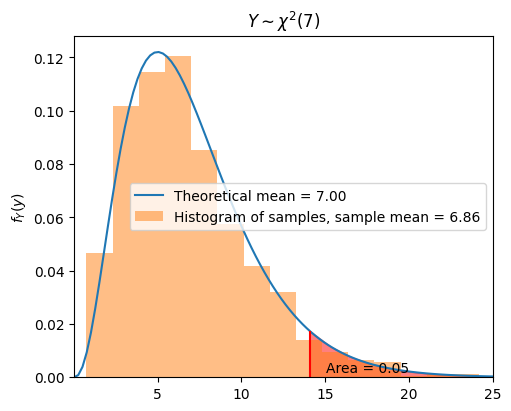

In [3]:
from scripts.testFuncs import test3

test3(n=7, numSamples=1000, alpha=0.05)

#### Why Do We Need the $\chi^2$ Distribution?

In some practical cases, we need to **estimate a confidence interval of the variance** of a distribution with unknown mean $\mu$ and unknown variance $\sigma^2$. Let $X_1, X_2, ..., X_n$ be i.i.d. $N(\mu, \sigma^2)$ random variables and $S^2$ be the sample variance for this random sample. By standarizing the random sample $X_i$'s, it is more convenient to estimate the variance

$$
Z_i = \frac{X_i - \mu}{\sigma} \sim N(0, 1).
$$

To calculate the variance of this standarized random sample $Z$, we define a random variable $Y = Z_1^2 + Z_2^2 + ... Z_n^2$ and we have

$$
Y = \sum_{i=1}^{n} Z_i^2 = \frac{1}{\sigma^2} \sum_{i=1}^{n} (X_i - \mu)^2
$$

Because we do not know the mean $\mu$ of $X$, we have to estimate $\mu$ by using the sample mean $\bar{X}$

$$
\begin{aligned}
Y = \frac{1}{\sigma^2} \sum_{i=1}^{n} (X_i - \mu)^2 
    &= \frac{1}{\sigma^2} \sum_{i=1}^{n} (X_i - \bar{X})^2 \\
    &= \frac{n - 1}{\sigma^2} \cdot \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})^2 \\
    &= \frac{(n - 1) \cdot S^2}{\sigma^2}.
\end{aligned}
$$

By the above discussion, we know that 

$$
Y   = \frac{(n - 1) \cdot S^2}{\sigma^2} = \sum_{i=1}^{n} \Big( \frac{X_i - \bar{X}}{\sigma} \Big)^2
$$

has a $\chi^2$ distribution with $n-1$ degrees of freedom, i.e., $Y \sim \chi^2(n-1)$.  
This result implies that we can derive the probability of the random variable $Y = \frac{(n - 1) \cdot S^2}{\sigma^2}$ within this region even though we have an unknown variance $\sigma^2$. 

$$
P \Bigg( \chi^2_{\frac{\alpha}{2}, n-1} \leq \frac{(n - 1) \cdot S^2}{\sigma^2} \leq \chi^2_{1-\frac{\alpha}{2}, n-1} \Bigg) = 1-\alpha
$$

By using some algebraic methods, we can get this result

$$
P \Bigg( \frac{(n-1) \cdot S^2}{\chi^2_{1-\frac{\alpha}{2}, n-1}} 
    \leq \sigma^2 
    \leq \frac{(n-1) \cdot S^2}{\chi^2_{\frac{\alpha}{2}, n-1}} \Bigg) = 1-\alpha
$$

Finally, we can report that $\Bigg[ \frac{(n-1) \cdot S^2}{\chi^2_{1-\frac{\alpha}{2}, n-1}}, \frac{(n-1) \cdot S^2}{\chi^2_{\frac{\alpha}{2}, n-1}} \Bigg]$ is a $(1 - \alpha) \times 100 \%$ confidence interval for $\sigma^2$.

- - -

### The $t$-Distribution (Student's $t$-Distribution)

As we have discussed, **we would like to estimate the mean of a distribution with unknown variance**. Again, let $X_1, X_2, ..., X_n$ be i.i.d. $N(\mu, \sigma^2)$ random variables and $S^2$ be the sample variance for this random sample. To estimate $\mu$, it is more precise to use $\bar{X}$ as our estimation as we have mentioned before and we would like to estimate the difference between our estimation $\bar{X}$ and $\mu$

$$
\bar{X} - \mu
$$

Intuitively, since $\bar{X}$ is also a random variable from a normal distribution $N(\mu, \frac{\sigma^2}{n})$, we can standarize it

$$
\frac{\bar{X} - \mu}{\sqrt{\text{Var}(\bar{X})}} = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}} \sim N(0, 1),
$$

which is equivalent to the random variable $Z \sim N(0, 1)$. However, with an unknown variance $\sigma^2$, we have to estimate the variance by using the sample variance $S^2$. Thus, we define a new random variance $T$ as shown in the following equation

$$
T = \frac{\bar{X} - \mu}{\frac{S}{\sqrt{n}}}. 
$$

To derive the distribution of random variable $T$, we have

$$
\begin{aligned}
T &= \frac{\bar{X} - \mu}{\frac{S}{\sqrt{n}}} \\
    &= \frac{\frac{\bar{X} - \mu}{\sigma/\sqrt{n}}}{\frac{S/\sqrt{n}}{\sigma/\sqrt{n}}} \\
    &= \frac{Z}{\sqrt{\frac{(n-1) S^2}{(n-1) \sigma^2}}} \\
    &= \frac{Z}{\sqrt{\chi_{n-1}^{2}/(n-1)}} \\
\end{aligned}
$$

which is the ratio of standard normal distribution to $\chi^2$ distribution with $n-1$ degrees of freedom. As a result, we define this ratio as the $t$-distribution and conclude that the random variable $T$ has a $t$-distribution with $n-1$ degrees of freedom.

The PDF of $t$-distribution is defined as

$$
f_T(t, \nu) = \frac{\Gamma \big(\frac{\nu + 1}{2} \big)}{\sqrt{\pi \nu} \Gamma (\frac{\nu}{2})} \Big( 1 + \frac{t^2}{\nu} \Big)^{-\frac{(\nu+1)}{2}}
$$

where $\nu$ represents the degrees of freedom.

Properties:

1. The expected value of $t$-distribution with $n$ degrees of freedom $\mathbb{E}[T] = 0$, for $n > 0$. But $\mathbb{E}[T]$ is undefined for $n = 1$.

2. The variance of $t$-distribution with $n$ degrees of freedom $\text{Var}(T) = \frac{n}{n-2}$, for $n > 2$. But $\text{Var}(T)$ is undefined for $n = 1, 2$.

3. As $n \to \infty$, $T(n) \to N(0, 1)$.

4. For any $p \in [0, 1]$ and $n \in \natnums$, we define $t_{p,n}$ as the real value for which $$P(T > t_{p,n}) = p.$$ Since the $t$-distribution has a symmetric PDF, we have $$t_{1-p,n} = -t_{p,n}$$ To calculate the $t$-distribution, we can use `scipy.stats.t`.

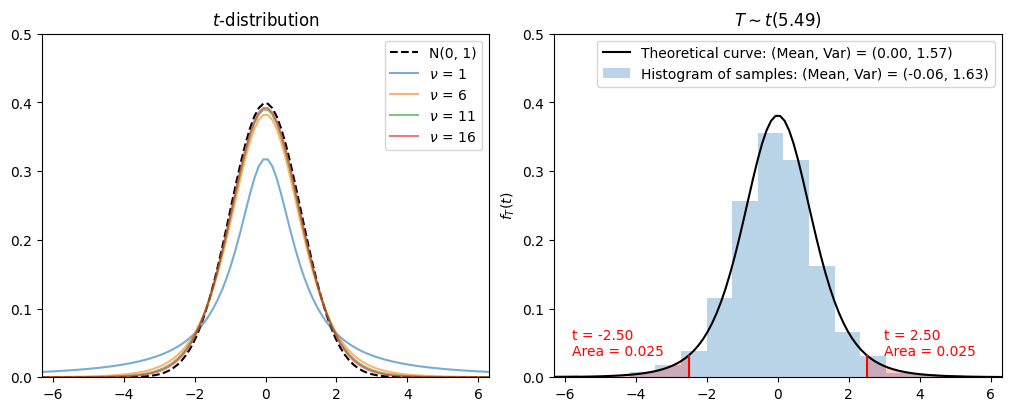

In [4]:
from scripts.testFuncs import test4

test4(n=5.487, numSamples=1000, alpha=0.05)

By the above discussion, we know that 

$$
T = \frac{\bar{X} - \mu}{\frac{S}{\sqrt{n}}}. 
$$

has a $t$-distribution with $n-1$ degrees of freedom, i.e., $T \sim t(n-1)$.  
This result implies that we can derive the probability of the random variable $T = \frac{\bar{X} - \mu}{S / \sqrt{n}}$ within this region even though we have an unknown variance $\sigma^2$. 

$$
P \Bigg( -t_{\frac{\alpha}{2}, n-1} \leq \frac{\bar{X} - \mu}{S / \sqrt{n}} \leq t_{\frac{\alpha}{2}, n-1} \Bigg) = 1-\alpha
$$

By using some algebraic methods, we can get this result

$$
P \Bigg( \bar{X} - t_{\frac{\alpha}{2}, n-1} \cdot \frac{S}{\sqrt{n}}
    \leq \mu 
    \leq \bar{X} + t_{\frac{\alpha}{2}, n-1} \cdot \frac{S}{\sqrt{n}} \Bigg) = 1-\alpha
$$

Finally, we can report that $\Bigg[ \bar{X} - t_{\frac{\alpha}{2}, n-1} \cdot \frac{S}{\sqrt{n}}, \bar{X} + t_{\frac{\alpha}{2}, n-1} \cdot \frac{S}{\sqrt{n}} \Bigg]$ is a $(1 - \alpha) \times 100 \%$ confidence interval for $\mu$ even though we have an unknown variance $\sigma^2$ and $n$ is not large (where the CLT cannot be applied).

- - -

### Summary: Confidence Intervals for Normal Samples ($n$ is not large)

#### When variance $\sigma^2$ is **known**

We can use the random variable $Q = \frac{\bar{X} - \mu}{\sigma / \sqrt{n}}$ to estimate $\mu$. As we have discussed earlier, $Q$ follows a standard normal distribution

$$
Q = \frac{\bar{X} - \mu}{\frac{\sigma}{\sqrt{n}}} \sim N(0,1).
$$

Thus, we can get

$$
\Bigg[ \bar{X} - z_{\frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}}, \bar{X} + z_{\frac{\alpha}{2}} \cdot \frac{\sigma}{\sqrt{n}} \Bigg]
$$ 

is approximately a $(1 - \alpha) \times 100 \% $ confidence interval for $\mu$.

#### When variance $\sigma^2$ is **unknown** 

We can use the random variable $T = \frac{\bar{X} - \mu}{S / \sqrt{n}}$ to estimate $\mu$, where $S^2$ represents the sample variance. As we have discussed earlier, $T$ follows the $t$-distribution with $n-1$ degrees of freedom

$$
T = \frac{\bar{X} - \mu}{\frac{S}{\sqrt{n}}} \sim T(n-1).
$$

Thus, we can get

$$
\Bigg[ \bar{X} - t_{\frac{\alpha}{2}, n-1} \cdot \frac{S}{\sqrt{n}}, \bar{X} + t_{\frac{\alpha}{2}, n-1} \cdot \frac{S}{\sqrt{n}} \Bigg]
$$ 

is approximately a $(1 - \alpha) \times 100 \% $ confidence interval for $\mu$.

Also, we can use the random variable $Y = \frac{(n - 1) \cdot S^2}{\sigma^2}$ to estimate $\sigma^2$. As we have discussed earlier, $Y$ follows the $\chi^2$ distribution with $n-1$ degrees of freedom

$$
Y = \frac{(n - 1) \cdot S^2}{\sigma^2} \sim \chi^2(n-1).
$$

And we can report that 

$$
\Bigg[ \frac{(n-1) \cdot S^2}{\chi^2_{1-\frac{\alpha}{2}, n-1}}, \frac{(n-1) \cdot S^2}{\chi^2_{\frac{\alpha}{2}, n-1}} \Bigg]
$$ 

is a $(1 - \alpha) \times 100 \%$ confidence interval for $\sigma^2$.

- - -

#### Example 4.11: Dr. Hsiao's Banana Farm

Dr. Hsiao is measuring something again. Different from the last time, we do know that he wants to know the growth of his banana farm. After careful and random measurements, he obtained the length of 20 bananas as follows:

$$
16.48, 23.68, 23.81, 10.18, 24.88, 11.17, 8.16, 16.54, 19.76, 22.43, \\
26.76, 20.72, 15.93, 20.37, 14.27, 17.16, 23.69, 23.94, 12.44, 6.48
$$

Assuming that the length is normally distributed with mean $\mu$ and variance $\sigma^2$, please find the $95 \%$ confidence intervals for $\mu$ and $\sigma^2$.

- Using the data we obtain

$$
\begin{aligned}
\bar{X} &= 17.94 \\
S^2 &= 36.05
\end{aligned}
$$

- Since $n = 20, \alpha = 0.05$, we can calculate the following values

$$
\begin{aligned}
t_{0.025, 19} &\approx 2.093 \\
\chi_{0.975, 19}^2 &\approx 32.852 \\
\chi_{0.025, 19}^2 &\approx 8.907
\end{aligned}
$$

- Therefore, the $95 \%$ confidence interval for $\mu$ is

$$
\Bigg[ 17.94 - 2.093 \cdot \sqrt{\frac{36.05}{20}}, 17.94 + 2.093 \cdot \sqrt{\frac{36.05}{20}} \Bigg] = [15.13, 20.75]
$$

- And the $95 \%$ confidence interval for $\sigma^2$ is

$$
\Bigg[ \frac{19 \cdot 36.05}{32.852}, \frac{19 \cdot 36.05}{8.907} \Bigg] = [20.85, 76.91]
$$

- - -

In [5]:
import numpy as np
from scipy.stats import chi2, t

data = np.array([16.48, 23.68, 23.81, 10.18, 24.88, 11.17, 8.16, 16.54, 19.76, 22.43, 
26.76, 20.72, 15.93, 20.37, 14.27, 17.16, 23.69, 23.94, 12.44, 6.48])

n = len(data)
alpha = 0.05
sampleMean = np.mean(data)
sampleVar = sum((data - sampleMean)**2)/(n-1)

tValue = t.ppf(q=1-alpha/2, df=n-1)
chiValue1 =chi2.ppf(q=1-alpha/2, df=n-1)
chiValue2 =chi2.ppf(q=alpha/2, df=n-1)

print("Confidence Interval for Mean = [{:.2f}, {:.2f}]".format(
          sampleMean - tValue*(sampleVar/n)**0.5, sampleMean + tValue*(sampleVar/n)**0.5
        ))

print("Confidence Interval for Variance = [{:.2f}, {:.2f}]".format(
          (n-1)*sampleVar/chiValue1, (n-1)*sampleVar/chiValue2
        ))

Confidence Interval for Mean = [15.13, 20.75]
Confidence Interval for Variance = [20.85, 76.91]


<details><summary>Random samples for example 4.11</summary>

```python
import numpy as np

rng = np.random.default_rng()
samples = rng.normal(loc=19.48, scale=5.43, size=20)

print(np.round(samples, decimals=2))
```


</details>

## Reference

For more information, please visit the [Introduction to Probability, Statistics and Random Processes](https://www.probabilitycourse.com/).